In [15]:
# Libraries
library(ggplot2)
library(tidyverse)
library(reshape2)

## Rapel:
    Il s'agit de trouver des données sur internet (Kaggle, site de l'Insee, data.gov, data.gouv.fr, etc.) et de les étudier. Ce n'est pas utile de prendre une grosse base de données (mais pas interdit non plus). Ensuite il faut choisir une ou des grandeurs d'intérêt, construire un ou deux estimateurs et de tester leurs propriétés sur les données, en effectuant quelques calculs théoriques (si possible) et en visualisant les données et leurs propriétés. Vous pouvez travailler à 2 ou 3 par groupe.

## Chargement des données
- Nous utilisons dans ce projet de le jeux de données sur les prix des maisons en Californie: [Source](https://www.kaggle.com/camnugent/california-housing-prices)
. Ce jeu de données des informations sur les maisons trouvées dans un district de Californie avec les information comme, la position géographique, le  nbre de chambre, le prix, etc.

1. **longitude**: mesure de la distance à l'ouest d'une maison; une valeur plus élevée est plus à l'ouest

2. **latitude**: mesure de la distance au nord d'une maison; une valeur plus élevée est plus au nord

3. **HousingMedianAge**: Âge médian d'une maison dans un pâté de maisons; un nombre inférieur est un bâtiment plus récent

4. **totalRooms**: nombre total de chambres dans un bloc

5. **totalBedrooms**: nombre total de chambres dans un bloc

6. **population**: nombre total de personnes résidant dans un bloc

7. **households**: nombre total de ménages, un groupe de personnes résidant dans une unité d'habitation, pour un bloc

8. **median_income**: revenu médian des ménages dans un pâté de maisons (mesuré en dizaines de milliers de dollars américains)

9. **medianHouseValue**: valeur médiane des maisons pour les ménages dans un pâté de maisons (mesurée en dollars américains)

In [22]:
# Lecture des données
data = read.table("housing.csv",header=T,sep=",")
head(data) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


### Stats basic

In [18]:
summary(data)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1462  
 Median :-118.5   Median :34.25   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.59      Mean   : 2644  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3151  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :37937  
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 297.0   1st Qu.:  790   1st Qu.: 282.0   1st Qu.: 2.5664  
 Median : 434.0   Median : 1167   Median : 409.0   Median : 3.5446  
 Mean   : 539.4   Mean   : 1430   Mean   : 501.2   Mean   : 3.8836  
 3rd Qu.: 648.2   3rd Qu.: 1721   3rd Qu.: 605.2   3rd Qu.: 4.7670  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 median_house_value
 Min.   : 1499

No id variables; using all as measure variables



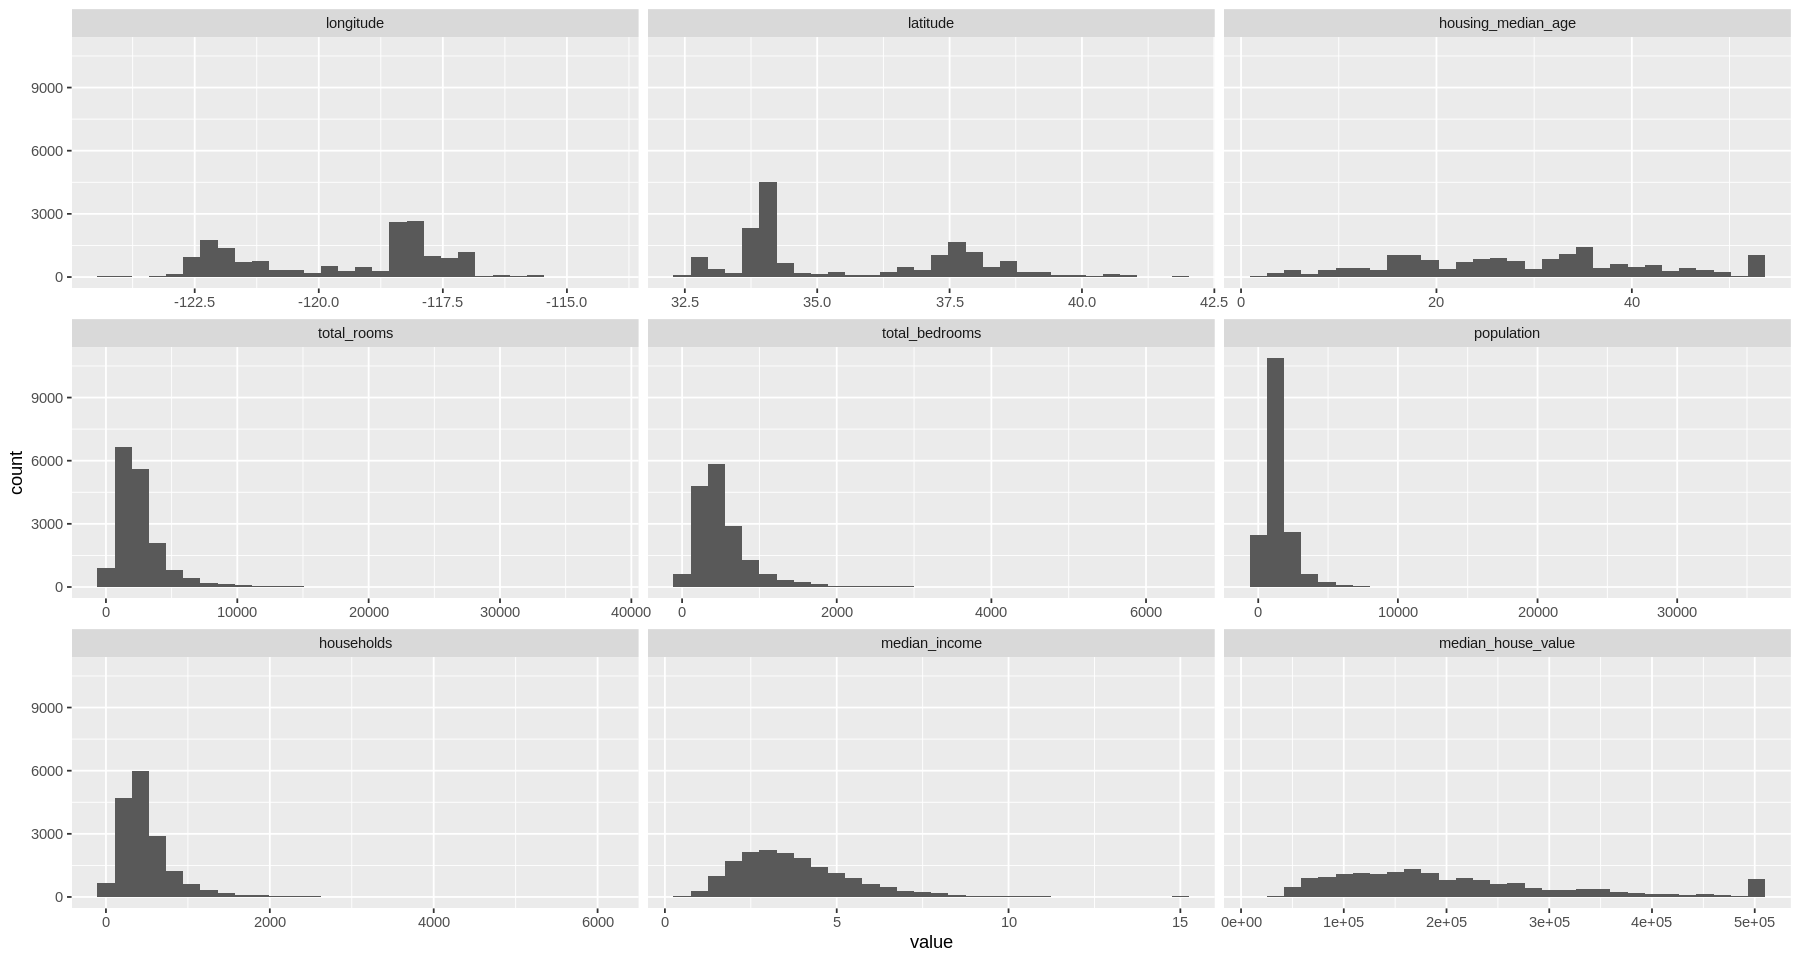

In [19]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = melt(data), mapping = aes(x = value)) + 
    geom_histogram(bins = 30) + facet_wrap(~variable, scales = 'free_x')

In [21]:
data$total_bedrooms/data$households
housing$total_rooms/housing$households

drops = c('total_bedrooms', 'total_rooms')

housing = housing[ , !(names(housing) %in% drops)]

[1]  2.7182203  4.1058315  1.4871795  1.4911504  1.2442748  0.9874477
    [7]  1.0742496  1.0632911  1.1126894  1.1402214  0.9720874  1.1052632
   [13]  1.1753555  0.9686848  1.2600000  1.4638404  1.2578125  1.2222222
   [19]  1.2062500  1.6000000  1.1881188  1.7482014  1.6379310  2.4807692
   [25]  1.4028269  1.5617978  0.9611940  1.0344828  1.1301775  1.0690909
   [31]  1.0534759  1.0871369  1.0594595  0.9884393  0.8432836  1.1340206
   [37]  1.2516779  1.0292887  1.0707395  0.9811321  1.0926966  1.1195929
   [43]  0.9518272  1.1250000  0.9880952  1.0357895  1.2756098  0.9396552
   [49]  0.9053628  1.0499139  2.1587302  1.1185771  1.1341991  1.1072464
   [55]  0.9127182  1.1483680  1.0120120  1.0658915  0.9781145  1.9509804
   [61]  1.1221239  1.0691824  1.0686275  0.9789157  0.9613402  1.0551181
   [67]  1.0367454  1.0558140  1.0689655  1.0138889  1.1205074  1.1532847
   [73]  0.8875000  1.0995025  1.1489362  1.1305970  1.1401425  1.0478589
   [79]  1.0683761  1.1006711  1.0886571  1.0209790  1.0447761  1.0575916
   [85]  1.1551020  1.1729730  1.0760000  1.0406504  1.0451389  1.0176056
   [91]  1.1578947  1.0000000  1.0585586  1.0072202  1.5161290  1.0000000
   [97]  1.0099502  1.1241685  0.9833729  1.1048387  1.0696864  1.1959459
  [103]  1.3169014  1.0160256  1.0608696  1.0645161  1.0000000  0.9912536
  [109]  1.8333333  1.4082840  2.4615385  1.6885246  1.4210526  1.1250000
  [115]  1.5160000  2.9716312  2.4500000  1.6000000  1.3013699  1.2035398
  [121]  2.0476190  1.4705882  1.4210526  1.9166667  1.9633700  1.7272727
  [127]  1.7721519  1.0585635  1.7457627  1.0104167  1.1607143  1.6491228
  [133]  1.8589744  1.2899834  1.1866667  1.3475034  0.9971831  1.1970803
  [139]  3.4111111  1.3769531  0.7714286  1.1264108  1.0653846  1.0152284
  [145]  1.3267974  1.1583710  0.9047619  0.9909091  0.9979036  1.1682243
  [151]  1.1617021  1.6102362  0.9504950  1.0562130  1.0194301  1.0602410
  [157]  1.0460993  1.8122066  3.0993377  1.0527607  1.1540984  1.0530612
  [163]  2.1172070  0.9246862  1.1180438  1.0852776  1.1207921  1.1112299
  [169]  1.2054201  1.1065089  1.1234568  1.1871658  4.0463576  1.5434783
  [175]  1.8474576  1.3265836  1.6170213  1.5822368  1.1559252  1.1714286
  [181]  1.1641587  1.1654979  1.1458824  1.2551020  1.9837838  1.2843750
  [187]  2.8510174  1.7559263  1.7423729  1.1633238  1.6512262  2.5146104
  [193]  1.3904263  3.4419643  2.0210526  1.2976939  1.0875000  1.9115385
  [199]  1.5318471  1.7287421  1.1919087  1.3653962  1.5051163  1.8531856
  [205]  1.0803571  1.1398693  2.4038462  1.2299742  2.0295455  2.2105263
  [211]  2.2480190  1.4782609  1.2307692  1.0562347  1.7195903  1.8481013
  [217]  1.1246106  1.1252159  2.1135225  1.6920732  3.7164179  1.1964286
  [223]  1.5524257  1.2461240  1.1111111  1.1677116  1.1238616  1.2139175
  [229]  1.1905512  1.1842482  1.2970588  1.8786008  2.0200000  1.3668342
  [235]  1.1954887  2.7252907  1.5308642  1.1610117  6.0714286  1.0388842
  [241]  1.4513514  1.4670782  2.6579213  1.2323322  1.3356164  1.3133047
  [247]  1.1338346  1.3067873  1.9303371  1.3350634  1.2987805  1.2180451
  [253]  1.1439280  1.6350037  1.3723881  2.1635514  1.2781506  1.4609844
  [259]  1.5584270  1.9368879  1.6242775  1.4223256  1.5113636  1.7272727
  [265]  1.2112578  1.3400000  1.5514019  1.7937025  1.1081081  1.2200557
  [271]  1.3969595  1.4147287  2.0000000  2.4876990  1.1369128  1.0328947
  [277]  1.7209302  2.7882353  1.1543210  1.2111111  1.4830508  1.4357895
  [283]  2.7314050  1.4056464  3.8768116  1.0988296  1.0857788  2.2579787
  [289]  3.3333333  1.2407407  1.1250000  1.0915698  1.2013730  1.1467295
  [295]  1.0149254  1.0901526  1.0590631  1.6153846  1.0347985  5.8282443
  [301]  3.8618677  1.0312500  1.0727729  1.2658960  1.0769231  1.3026316
  [307]  4.7031963  1.0620690  7.1060606  1.0916667  1.5945946  1.0623501
  [313]  1.0582707  0.9855072  1.0925267  1.0034483  1.0747331  1.1262136
  [319]  1.0613668  1.3589744  1.0388350  0.9761431  2.2000000  3.6513761
  [325] 

In [ ]:
housing$mean_bedrooms = housing$total_bedrooms/housing$households
housing$mean_rooms = housing$total_rooms/housing$households

drops = c('total_bedrooms', 'total_rooms')

housing = housing[ , !(names(housing) %in% drops)]